<b> add your surname and name here!!!!!!</b>

##  SURNAME: Caprile NAME: Riccardo

In [19]:
import numpy as np
import cv2 as cv2
from scipy import signal
import matplotlib.pyplot as plt
from visualize_flow import flow_to_color
import time
%matplotlib inline


##  Lucas-Kanade optical flow algorithm

In this lab we deepen our understanding on the Lucas Kanade (LK) optical flow algorithm. 

<ol>
    <li>Part 1: we go into the <b>implementation details</b> of a single scale estimation (the one we saw in class) </li>
    <li>Part 2 (optional): we will use the <b>pre-implemented </b> algorithm (OpenCV) for a multi-resolution pyramidal version.</li>
</ol>
 
### Part1 - Single Scale LK 

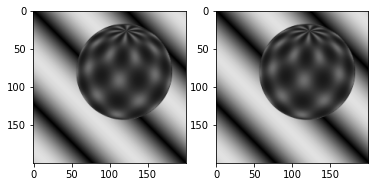

In [54]:
# we start by loading a pair of adjacent frames

img1= cv2.imread('Data/sphere/sphere.12.ppm',cv2.IMREAD_GRAYSCALE)
img2= cv2.imread('Data/sphere/sphere.13.ppm',cv2.IMREAD_GRAYSCALE)
img3= cv2.imread('Data/stennis/stennis_002.ppm',cv2.IMREAD_GRAYSCALE)
img4= cv2.imread('Data/stennis/stennis_003.ppm',cv2.IMREAD_GRAYSCALE)

plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

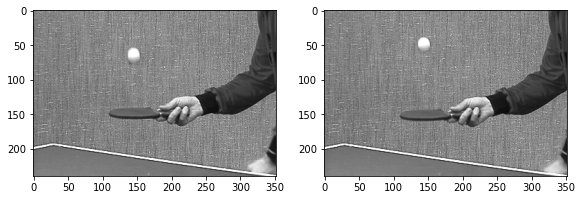

<b> Fill in the missing details on the Lucas_Kanade function, after you analyse and understand what's already there: </b>

In [31]:
# this function computes the optical flow between 2 frames
# window_size controls the size of the pixel neighbourhood
# tau is a threshould on the "quality" of the neighbourhood (explained in class)

def Lucas_Kanade(im1,im2,window_size,tau):
    # spatio-temporal derivative kernels
    kernel_x = np.array([[-1., 1.], [-1., 1.]])*.25 
    kernel_y = np.array([[-1., -1.], [1., 1.]])*.25
    kernel_t = np.array([[1., 1.], [1., 1.]])*.25
    w = int(window_size/2) # window_size is odd, all the pixels with offset in between [-w, w] are inside the window
    I1g = im1 / 255. # normalize pixels
    I2g = im2 / 255. # normalize pixels
    # Implement Lucas Kanade
    # for each point, calculate I_x, I_y, I_t
    
    #computing the derivatives
    mode = 'same'
    fx = signal.convolve2d(I1g, kernel_x, boundary='symm', mode=mode)# + signal.convolve2d(I2g, kernel_x, boundary='symm', mode=mode)
    fy = signal.convolve2d(I1g, kernel_y, boundary='symm', mode=mode)# + signal.convolve2d(I2g, kernel_y, boundary='symm', mode=mode) 
    ft = signal.convolve2d(I1g, kernel_t, boundary='symm', mode=mode) +signal.convolve2d(I2g, -kernel_t, boundary='symm', mode=mode)
    u = np.zeros(I1g.shape)
    v = np.zeros(I1g.shape)
    # within window window_size * window_size
    
    # see slides (Optical Flow Algorithm) 
    for i in range(w, I1g.shape[0]-w):
        for j in range(w, I1g.shape[1]-w):
            #For every pixel of the image we build a system of equations. for each point in the neighbourhood
            Ix = fx[i-w:i+w+1, j-w:j+w+1].flatten()
            Iy = fy[i-w:i+w+1, j-w:j+w+1].flatten()
            It = np.array(ft[i-w:i+w+1, j-w:j+w+1].flatten())
            #Construction of the matrix A and b for resolving Au=b
            A = np.transpose(np.array([Ix,Iy]))
            b = -It # FILL IN THIS LINE
            if np.min(abs(np.linalg.eigvals(np.matmul(A.T, A)))) >= tau: 
                nu = np.matmul(np.linalg.pinv(A), b)  # A is not inverible , for resolving the system we need the pseudo inverse
                u[i,j]=nu[0]
                v[i,j]=nu[1]
      

    return (u,v) #two components of the optical flow

Call the previously defined method

In [35]:
start = time.time()
[u,v] = Lucas_Kanade(img1,img2,7,0.0001)
print("Elapsed time is %d"%(time.time()-start))

Elapsed time is 2


Let's visualize the results of the flow field. We may try the quiver function first

(200, 200)
(200, 200)


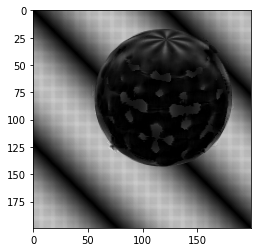

In [36]:
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
print(u.shape)
print(v.shape)
xaxis = list(np.arange(img1.shape[0]))
yaxis = list(np.arange(img1.shape[1]))
plt.xlim(0, 199)
plt.ylim(199,0)
plt.quiver(u,v)

We may also visualize the flow field using a color-coding algorithm ( See https://github.com/tomrunia/OpticalFlow_Visualization)

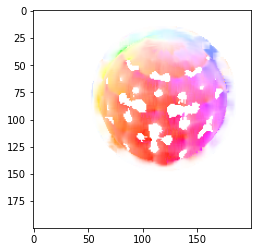

In [37]:
flow = np.stack([u,v],axis=2)
flow_color = flow_to_color(flow, convert_to_bgr=False)
plt.imshow(flow_color)

###   Analysis:

- Go back to the function Lucas_Kanade and a comment to explain each line of code  
- In particular, can you explain this? <tt> np.min(abs(np.linalg.eigvals(np.matmul(A.T, A)))) >= tau: </tt>

### Experiments:
- Try different window size and thresholds tau 
- Try different frames (also introducing some temporal gap between them)  
- Try both sphere and tennis datasets
- What do you observe ? Do you see any specific limits in the very simple LK method?


**Comment** Let's try a different threshold and window size

In [44]:
start = time.time()
[u,v] = Lucas_Kanade(img1,img2,2,0.00001)
print("Elapsed time is %d"%(time.time()-start))

Elapsed time is 2


(200, 200)
(200, 200)


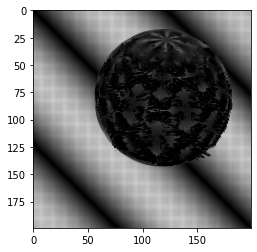

In [45]:
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
print(u.shape)
print(v.shape)
xaxis = list(np.arange(img1.shape[0]))
yaxis = list(np.arange(img1.shape[1]))
plt.xlim(0, 199)
plt.ylim(199,0)
plt.quiver(u,v)

**Comment**
Let's try the tennis dataset

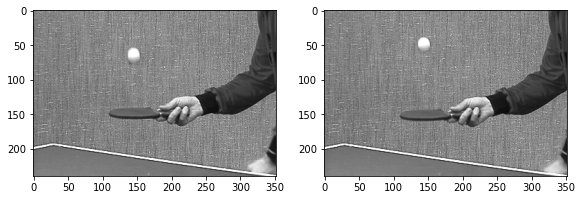

In [56]:


plt.figure(figsize=(20,20))
plt.subplot(1,4,1)
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
plt.subplot(1,4,2)
plt.imshow(cv2.cvtColor(img4, cv2.COLOR_BGR2RGB))

In [64]:
start = time.time()
[u,v] = Lucas_Kanade(img3,img4,7,0.00001)
print("Elapsed time is %d"%(time.time()-start))

Elapsed time is 7


(240, 352)
(240, 352)


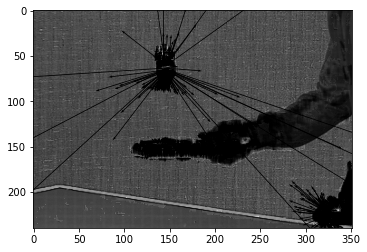

In [65]:
plt.imshow(cv2.cvtColor(img4, cv2.COLOR_BGR2RGB))
print(u.shape)
print(v.shape)
xaxis = list(np.arange(img3.shape[0]))
yaxis = list(np.arange(img3.shape[1]))

plt.quiver(u,v)

**Comment**

As we can see with result image the arrows of the optical flow are only on the part of image that should be moving (table tennis ball).

The probelm appears with the arrows that are going in a lot of different directions. 

it is difficult di understand if the algorithm was able to detect the direction of the ball ( up or down?)

### Optional Part2 - Pyramidal LK
<i>We did not cover the Pyramidal extension during the OF class; this part should be considered as additional and optional material. </i>
<br>
Now let's take a look at the implementation provided in OpenCV of a pyramid Lucas-Kanade Sparse optical flow

The algorithm evaluates optical flow on sparse points (corners) in order to avoid the ill-posed inversion of A'A.
Additionally, Optical flow is calculated and combined on different scales to handle large-displacement

In [66]:
#parameters of the corner detection procedure
feature_params = dict( maxCorners = 100,
                       qualityLevel = 0.1,
                       minDistance = 7,
                       blockSize = 7 )

# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (15,15),
                  maxLevel = 2,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))


1- Call the function that detects the key-points (Shi-Tomasi corners) from the first frame 
2- Call LK Flow algorithm which returns the positions of these key points in the second frame

In [67]:
p0 = cv2.goodFeaturesToTrack(img1, mask = None, **feature_params)
p1, st, err = cv2.calcOpticalFlowPyrLK(img1, img2, p0, None, **lk_params)

Draw vectors to connect points from the first frame and the second frame to visualize the motion vectors

(21, 2)


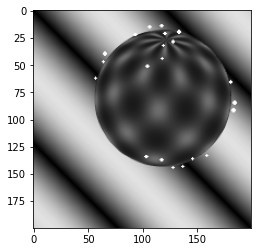

In [68]:
good_new = p1[st==1]
good_old = p0[st==1]
mask = np.zeros_like(img1)
print(good_old.shape)
for i,(new,old) in enumerate(zip(p1,p0)):
    a,b = np.int32(new.ravel())
    c,d = np.int32(old.ravel())
    mask = cv2.line(mask, (a,b),(c,d), [255,255,0], 2)
img2 = cv2.add(img2,mask)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
